#### Data collection and cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("The-Big-List-All-reviews-up-to-3950.xlsx")

In [3]:
df

,Review #,Brand,Variety,Style,Country,Stars,T
0,3950,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,NaN
1,3949,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5,NaN
2,3948,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.5,NaN
3,3947,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,NaN
4,3946,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0,NaN
...,...,...,...,...,...,...,...
3945,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
3946,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3947,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3948,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [4]:
# check for missing values
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           3950
dtype: int64

In [5]:
# removing unneeded columns
df = df.drop(['Review #', 'T'], axis=1)
df

,Brand,Variety,Style,Country,Stars
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.5
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0
...,...,...,...,...,...
3945,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3946,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3947,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3948,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [6]:
# checking for dtypes
df.dtypes

Brand      object
Variety    object
Style      object
Country    object
Stars      object
dtype: object

Strings should be object, but Stars values should be in int dtype

In [7]:
# value_counts method to examine unique values
df['Stars'].value_counts()

5                      726
3.5                    590
3.75                   557
4                      466
4.5                    267
3.25                   230
4.25                   222
3                      182
2.75                   114
2                      103
2.5                     99
4.75                    97
1.5                     53
0                       44
1                       42
1.75                    32
2.25                    30
0.5                     22
0.25                    18
1.25                    16
NR                       3
Unrated                  3
4.25/5                   2
2.9                      2
2.8                      2
4.125                    2
1.1                      2
3.1                      2
0.75                     2
4.5/5                    1
3.4                      1
3.65                     1
5/2.5                    1
2.125                    1
3.7                      1
3.2                      1
2017-05-04 00:00:00      1
2

<b>Fractions to turn into float

|4.25/5    |               2|

|4.5/5     |               1|

|5/2.5     |               1|

|3.5/2.5   |               1|

In [8]:
df['Stars'] = df['Stars'].replace(to_replace = '4.5/5', value = 4.5)
df['Stars'] = df['Stars'].replace(to_replace = '5/2.5', value = 2.5)
df['Stars'] = df['Stars'].replace(to_replace = '3.5/2.5', value = 2.5)
df['Stars'] = df['Stars'].replace(to_replace = '4.25/5', value = 4.25)

df['Stars'].value_counts()

5                      726
3.5                    590
3.75                   557
4                      466
4.5                    268
3.25                   230
4.25                   224
3                      182
2.75                   114
2                      103
2.5                    101
4.75                    97
1.5                     53
0                       44
1                       42
1.75                    32
2.25                    30
0.5                     22
0.25                    18
1.25                    16
NR                       3
Unrated                  3
2.9                      2
0.75                     2
3.1                      2
1.1                      2
2.8                      2
4.125                    2
3.4                      1
3.7                      1
3.65                     1
2.125                    1
3.2                      1
2017-05-04 00:00:00      1
2017-04-04 00:00:00      1
0.1                      1
3.125                    1
N

<b> remove string values in stars
    
    Unrated 
    
    NR
    
    NS

In [9]:
# coverting any data that is not a number to NaN
df['Stars'] = pd.to_numeric(df['Stars'], errors = 'coerce')
df['Stars'].value_counts()

5.000    726
3.500    590
3.750    557
4.000    466
4.500    268
3.250    230
4.250    224
3.000    182
2.750    114
2.000    103
2.500    101
4.750     97
1.500     53
0.000     44
1.000     42
1.750     32
2.250     30
0.500     22
0.250     18
1.250     16
2.800      2
1.100      2
2.900      2
3.100      2
4.125      2
0.750      2
3.700      1
3.400      1
2.100      1
3.600      1
1.800      1
2.125      1
0.100      1
0.900      1
3.125      1
2.300      1
2.850      1
3.650      1
3.200      1
Name: Stars, dtype: int64

In [10]:
# check for NaN in Stars
df.isnull().sum()

Brand       0
Variety     0
Style       0
Country     0
Stars      10
dtype: int64

In [11]:
# removing rows with NaN
df = df.dropna()

In [12]:
# export to csv
df.to_csv("thebiglist_clean.csv", index=None)

In [13]:
pd.read_csv("thebiglist_clean.csv")

,Brand,Variety,Style,Country,Stars
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00
...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


#### Feature extraction, visualization and statistics

In [14]:
import string
import collections
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
df = pd.read_csv("thebiglist_clean.csv")
df

,Brand,Variety,Style,Country,Stars
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00
...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


In [16]:
# feature extraction = scrutinising the strings in Variety
variety = df['Variety']
variety

0                        Mocchi Cchi Hello Kitty Yakisoba
1                                     Fish Head Casserole
2        Artisanal Ramen Broth - Miso / Jongga Ramen Sari
3             Cup Noodles Roasted Duck w/Sweet Onion Soup
4                               Donbei Simple Taste Somen
                              ...                        
3935    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3936                       Oriental Style Instant Noodles
3937                                       Tom Yum Shrimp
3938                                 Tom Yum Chili Flavor
3939                                           Miso Ramen
Name: Variety, Length: 3940, dtype: object

In [17]:
# joining of all strings
variety_text = " ".join(variety)
variety_text

'Mocchi Cchi Hello Kitty Yakisoba Fish Head Casserole Artisanal Ramen Broth - Miso / Jongga Ramen Sari Cup Noodles Roasted Duck w/Sweet Onion Soup Donbei Simple Taste Somen Top Ramen Chicken Flavor Ramen Noodle Soup 50th Anniversary Edition Chicken Rice Flavor Dry Noodle Small Shrimp Tensoba Tonkotsu Ramen Raoh Rich Miso Ramen Bubuka Abura Soba Asian Style Sesame Teriyaki Noodle With Miso & Garlic Malaysia Chili Pan Mee Jintong Sour & Hot Pumpkin Flavor Wakayama Ramen Kinmen Thin Noodles - Sesame Oil Flavor Miso Ramen / Garlic / Kewpie Mayonnaise / Egg Japanese Tarako Spaghetti Chongqing Noodles Umakara Tantanmen Ramen Noodles Shrimp Wonton Flavor Ramen Noodle Soup Beef Flavor Luosifer Instant Rice Noodle Fresh Jjajang Noodle Bowl Monster x Daebak Ghost Pepper Kari Lontong Monster x Daebak Ghost Pepper Mie Goreng Indonesia Scallop & Hua Diao Wine Chicken Noodle Soup Protein Noodles Sriracha Ramen Noodle Soup Chicken Flavor White Fish Broth Rice Vermicelli Ramen Noodles Spicy Artificial

In [18]:
variety_text_lower = variety_text.lower()
variety_text_lower

'mocchi cchi hello kitty yakisoba fish head casserole artisanal ramen broth - miso / jongga ramen sari cup noodles roasted duck w/sweet onion soup donbei simple taste somen top ramen chicken flavor ramen noodle soup 50th anniversary edition chicken rice flavor dry noodle small shrimp tensoba tonkotsu ramen raoh rich miso ramen bubuka abura soba asian style sesame teriyaki noodle with miso & garlic malaysia chili pan mee jintong sour & hot pumpkin flavor wakayama ramen kinmen thin noodles - sesame oil flavor miso ramen / garlic / kewpie mayonnaise / egg japanese tarako spaghetti chongqing noodles umakara tantanmen ramen noodles shrimp wonton flavor ramen noodle soup beef flavor luosifer instant rice noodle fresh jjajang noodle bowl monster x daebak ghost pepper kari lontong monster x daebak ghost pepper mie goreng indonesia scallop & hua diao wine chicken noodle soup protein noodles sriracha ramen noodle soup chicken flavor white fish broth rice vermicelli ramen noodles spicy artificial

In [19]:
# creating a list of commonly used punctuations
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [20]:
# looping thru each char in list and gets appended in the char list if not in punc_list
[char for char in variety_text_lower if char not in punc_list]

['m',
 'o',
 'c',
 'c',
 'h',
 'i',
 ' ',
 'c',
 'c',
 'h',
 'i',
 ' ',
 'h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'k',
 'i',
 't',
 't',
 'y',
 ' ',
 'y',
 'a',
 'k',
 'i',
 's',
 'o',
 'b',
 'a',
 ' ',
 'f',
 'i',
 's',
 'h',
 ' ',
 'h',
 'e',
 'a',
 'd',
 ' ',
 'c',
 'a',
 's',
 's',
 'e',
 'r',
 'o',
 'l',
 'e',
 ' ',
 'a',
 'r',
 't',
 'i',
 's',
 'a',
 'n',
 'a',
 'l',
 ' ',
 'r',
 'a',
 'm',
 'e',
 'n',
 ' ',
 'b',
 'r',
 'o',
 't',
 'h',
 ' ',
 ' ',
 'm',
 'i',
 's',
 'o',
 ' ',
 ' ',
 'j',
 'o',
 'n',
 'g',
 'g',
 'a',
 ' ',
 'r',
 'a',
 'm',
 'e',
 'n',
 ' ',
 's',
 'a',
 'r',
 'i',
 ' ',
 'c',
 'u',
 'p',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 's',
 ' ',
 'r',
 'o',
 'a',
 's',
 't',
 'e',
 'd',
 ' ',
 'd',
 'u',
 'c',
 'k',
 ' ',
 'w',
 's',
 'w',
 'e',
 'e',
 't',
 ' ',
 'o',
 'n',
 'i',
 'o',
 'n',
 ' ',
 's',
 'o',
 'u',
 'p',
 ' ',
 'd',
 'o',
 'n',
 'b',
 'e',
 'i',
 ' ',
 's',
 'i',
 'm',
 'p',
 'l',
 'e',
 ' ',
 't',
 'a',
 's',
 't',
 'e',
 ' ',
 's',
 'o',
 'm',
 'e'

In [21]:
# joining back the chars to form string
variety_clean = "".join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'mocchi cchi hello kitty yakisoba fish head casserole artisanal ramen broth  miso  jongga ramen sari cup noodles roasted duck wsweet onion soup donbei simple taste somen top ramen chicken flavor ramen noodle soup 50th anniversary edition chicken rice flavor dry noodle small shrimp tensoba tonkotsu ramen raoh rich miso ramen bubuka abura soba asian style sesame teriyaki noodle with miso  garlic malaysia chili pan mee jintong sour  hot pumpkin flavor wakayama ramen kinmen thin noodles  sesame oil flavor miso ramen  garlic  kewpie mayonnaise  egg japanese tarako spaghetti chongqing noodles umakara tantanmen ramen noodles shrimp wonton flavor ramen noodle soup beef flavor luosifer instant rice noodle fresh jjajang noodle bowl monster x daebak ghost pepper kari lontong monster x daebak ghost pepper mie goreng indonesia scallop  hua diao wine chicken noodle soup protein noodles sriracha ramen noodle soup chicken flavor white fish broth rice vermicelli ramen noodles spicy artificial pork flav

In [22]:
# tokens = removing of empty spaces
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['mocchi',
 'cchi',
 'hello',
 'kitty',
 'yakisoba',
 'fish',
 'head',
 'casserole',
 'artisanal',
 'ramen',
 'broth',
 'miso',
 'jongga',
 'ramen',
 'sari',
 'cup',
 'noodles',
 'roasted',
 'duck',
 'wsweet',
 'onion',
 'soup',
 'donbei',
 'simple',
 'taste',
 'somen',
 'top',
 'ramen',
 'chicken',
 'flavor',
 'ramen',
 'noodle',
 'soup',
 '50th',
 'anniversary',
 'edition',
 'chicken',
 'rice',
 'flavor',
 'dry',
 'noodle',
 'small',
 'shrimp',
 'tensoba',
 'tonkotsu',
 'ramen',
 'raoh',
 'rich',
 'miso',
 'ramen',
 'bubuka',
 'abura',
 'soba',
 'asian',
 'style',
 'sesame',
 'teriyaki',
 'noodle',
 'with',
 'miso',
 'garlic',
 'malaysia',
 'chili',
 'pan',
 'mee',
 'jintong',
 'sour',
 'hot',
 'pumpkin',
 'flavor',
 'wakayama',
 'ramen',
 'kinmen',
 'thin',
 'noodles',
 'sesame',
 'oil',
 'flavor',
 'miso',
 'ramen',
 'garlic',
 'kewpie',
 'mayonnaise',
 'egg',
 'japanese',
 'tarako',
 'spaghetti',
 'chongqing',
 'noodles',
 'umakara',
 'tantanmen',
 'ramen',
 'noodles',
 'shrimp',


In [23]:
# frequency of each tokens

variety_counter = collections.Counter(variety_tokens) # a dict {token: counter}
variety_counter


Counter({'mocchi': 1,
         'cchi': 1,
         'hello': 7,
         'kitty': 7,
         'yakisoba': 105,
         'fish': 16,
         'head': 1,
         'casserole': 3,
         'artisanal': 1,
         'ramen': 703,
         'broth': 27,
         'miso': 91,
         'jongga': 1,
         'sari': 1,
         'cup': 262,
         'noodles': 936,
         'roasted': 13,
         'duck': 18,
         'wsweet': 1,
         'onion': 46,
         'soup': 351,
         'donbei': 11,
         'simple': 1,
         'taste': 49,
         'somen': 4,
         'top': 29,
         'chicken': 456,
         'flavor': 539,
         'noodle': 831,
         '50th': 1,
         'anniversary': 5,
         'edition': 12,
         'rice': 192,
         'dry': 38,
         'small': 3,
         'shrimp': 159,
         'tensoba': 3,
         'tonkotsu': 125,
         'raoh': 22,
         'rich': 25,
         'bubuka': 1,
         'abura': 1,
         'soba': 57,
         'asian': 23,
         'style': 

In [24]:
# sorting
variety_counter.most_common()

[('noodles', 936),
 ('noodle', 831),
 ('ramen', 703),
 ('instant', 597),
 ('flavor', 539),
 ('flavour', 538),
 ('chicken', 456),
 ('spicy', 437),
 ('soup', 351),
 ('beef', 330),
 ('cup', 262),
 ('with', 239),
 ('sauce', 219),
 ('hot', 204),
 ('curry', 199),
 ('rice', 192),
 ('shrimp', 159),
 ('artificial', 158),
 ('tom', 155),
 ('pork', 146),
 ('seafood', 146),
 ('mi', 146),
 ('bowl', 141),
 ('udon', 131),
 ('style', 126),
 ('tonkotsu', 125),
 ('yum', 110),
 ('yakisoba', 105),
 ('sesame', 100),
 ('goreng', 100),
 ('vermicelli', 92),
 ('miso', 91),
 ('shoyu', 82),
 ('vegetable', 77),
 ('soy', 73),
 ('oriental', 72),
 ('demae', 70),
 ('kimchi', 69),
 ('penang', 68),
 ('chili', 66),
 ('sour', 65),
 ('vegetarian', 62),
 ('mushroom', 62),
 ('oil', 61),
 ('black', 60),
 ('fried', 58),
 ('big', 58),
 ('soba', 57),
 ('shio', 55),
 ('japanese', 54),
 ('thai', 54),
 ('pepper', 53),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('tomato', 51),
 ('laksa', 51),
 ('taste', 49),
 ('white', 49),
 (

In [27]:
is_spicy = []

hot_spicy = ["spicy",
             "curry",
             "hot",
             "tom",
             "chili",
             "chilli",
             "kari",
             "pedas",
             "laksa"]

# look through variety column and also flavor in hot_flavor
# detect any matching flavor in hot_spicy in Variety (any() good for 2 list)
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_spicy):
        is_spicy.append(1)
    else:
        is_spicy.append(0)

# adding new column in dataframe
df['isSpicy'] = is_spicy
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,0
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00,0
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50,0
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,0
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00,0
...,...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1


In [28]:
has_chicken = []

for variety in df['Variety'].str.lower():
    if ('chicken' in variety) or ('ayam' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df['hasChicken'] = has_chicken

In [29]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
2792,Asian Thai Foods,Miteri Instant Noodles Vegetable Flavor,Pack,Nepal,3.50,0,0
3068,Nongshim,Chapagetti,Bowl,United States,5.00,0,0
2697,Nissin,Demae Rice Vermicelli Chicken Flavour Instant ...,Pack,Hong Kong,1.75,0,1
1636,Ajinatori,Chicken Flavor Ramen,Pack,Japan,3.50,0,1
1101,Myramen,Japanese Vegan Noodle & Soup Salt,Pack,Japan,3.25,0,0
443,Mr. Lee's Noodles,Hong Kong Street Beef,Cup,UK,4.50,0,0
2962,Sun Noodle,Ramen Pork Flavor,Tray,United States,5.00,0,0
3134,Ohsung,Hot Spicy Bowl With Soy Peptide,Bowl,South Korea,3.50,1,0
2994,Right Foods,Dr. McDougall's Vegan Chicken Ramen,Cup,United States,1.75,0,1
1428,Ogasawara,Kirin Giraffe Shoyu Ramen,Pack,Japan,4.50,0,0


In [30]:
has_beef = []

for variety in df['Variety'].str.lower():
    if ('beef' in variety) or ('cow' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df['hasBeef'] = has_beef
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,0,0,0
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00,0,0,0
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50,0,0,0
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,0,0,0
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00,0,0,0
...,...,...,...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,0,0
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,0,0
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,0,0


In [32]:
has_seafood = []

seafood_flavor = ["seafood",
                  "fish",
                  "shrimp",
                  "crab",
                  "prawn"]

# append(int) instead of str for data analysing
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
        
df['hasSeafood'] = has_seafood
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,0,0,0,0
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00,0,0,0,1
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50,0,0,0,0
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,0,0,0,0
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,0,0,0
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,0,0,0
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0,1
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,0,0,0


#### Data exploration

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Brand details
brand_count = df['Brand'].value_counts()[:50]
brand_count

Nissin               501
Maruchan             139
Nongshim             125
Myojo                121
Samyang Foods        102
Paldo                 85
Sapporo Ichiban       76
Mama                  71
Indomie               59
Acecook               54
Ottogi                52
Sau Tao               48
MyKuali               40
Maggi                 39
KOKA                  39
Vifon                 38
Mamee                 37
Vina Acecook          34
Lucky Me!             34
MAMA                  33
Ve Wong               32
Wai Wai               31
Master Kong           29
JML                   29
Vedan                 28
Wei Lih               28
A-Sha Dry Noodle      26
Itsuki                24
Doll                  24
Sichuan Baijia        23
Wu-Mu                 23
Yum Yum               23
Samyang               19
Koka                  18
New Touch             18
Uni-President         18
Mom's Dry Noodle      17
Little Cook           17
Batchelors            16
Daikoku               16


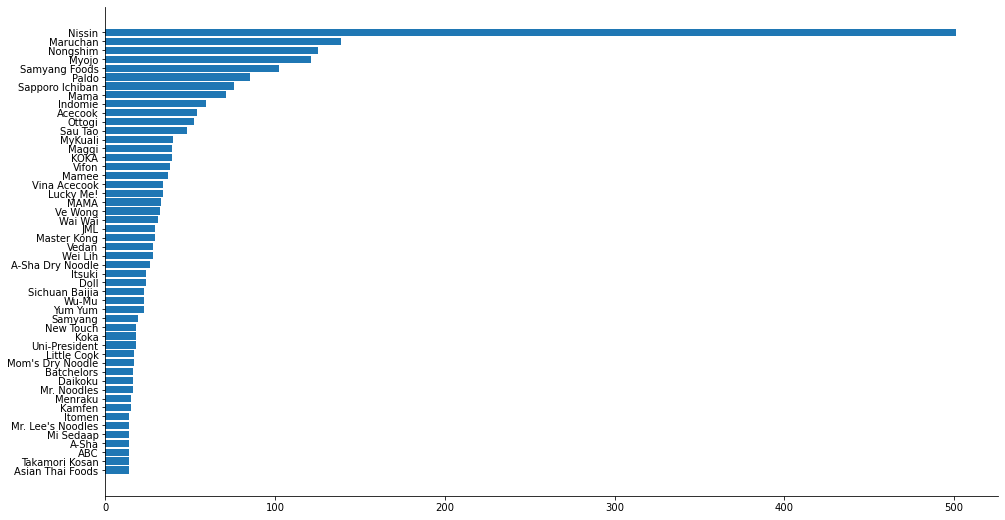

In [45]:
# resizing graph
plt.figure(figsize=(16,9))

# horz plot
plt.barh(brand_count.sort_values(ascending=True).index,
         brand_count.sort_values(ascending=True))

# plt.bar(brand_count.index, brand_count) # (y-axis, x-axis)
# rotate axis
#plt.xticks(rotation = 90)

sns.despine()

In [47]:
# explore style (packaging)
style_count = df['Style'].value_counts()
style_count

Pack          2193
Bowl           760
Cup            742
Tray           171
Box             69
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

<BarContainer object of 8 artists>

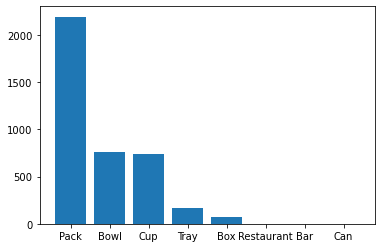

In [48]:
plt.bar(style_count.index, style_count)

In [49]:
# explore Country

country_count = df['Country'].value_counts()
country_count

Japan                 741
United States         517
South Korea           418
Taiwan                395
China                 275
Thailand              223
Malaysia              218
Hong Kong             200
Indonesia             167
Singapore             144
Vietnam               127
UK                     75
Canada                 56
Philippines            52
India                  46
Germany                37
Mexico                 32
Australia              25
Brazil                 24
Netherlands            16
Myanmar                14
Nepal                  14
Pakistan               13
Bangladesh             12
Hungary                 9
France                  6
Colombia                6
Poland                  6
Cambodia                5
Russia                  5
Serbia                  5
Sarawak                 5
Ireland                 4
Italy                   4
Fiji                    4
Peru                    4
Holland                 4
Dubai                   3
Sweden      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

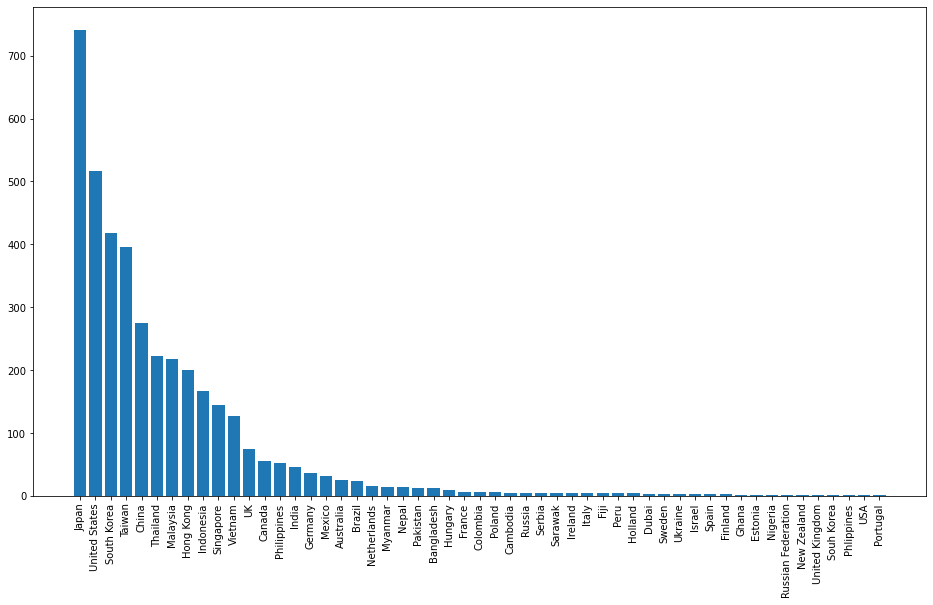

In [50]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index, country_count)
plt.xticks(rotation=90)

(array([  63.,   25.,   60.,   86.,  136.,  220.,  417., 1150.,  692.,
        1091.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

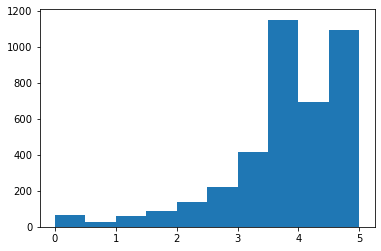

In [51]:
# distribution of scores in Stars column

plt.hist(df['Stars'])

In [52]:
df['Stars'].median()

3.75

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='count'>

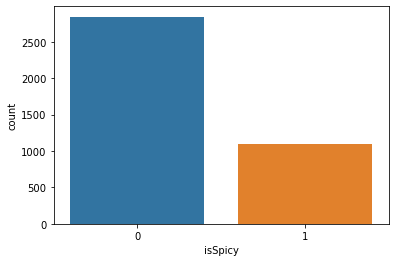

In [53]:
sns.countplot(df['isSpicy'])

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasChicken', ylabel='count'>

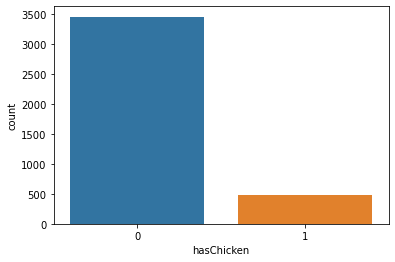

In [54]:
sns.countplot(df['hasChicken'])

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasBeef', ylabel='count'>

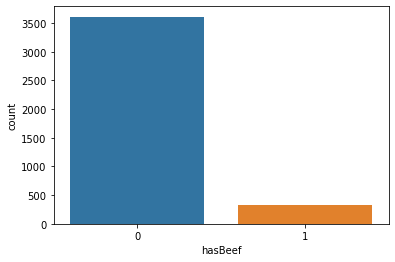

In [55]:
sns.countplot(df['hasBeef'])

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasSeafood', ylabel='count'>

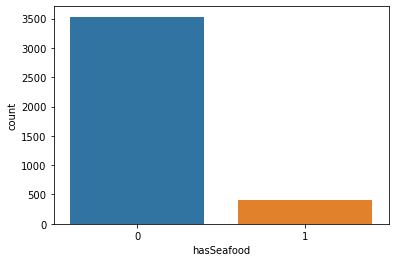

In [56]:
sns.countplot(df['hasSeafood'])

Questions:

1. Which brand has the highest Stars?
2. Which country has the highest Stars?
3. Which noodle has higher Stars - spicy or non-spicy?

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Nissin'),
  Text(1, 0, 'Maruchan'),
  Text(2, 0, 'Nongshim'),
  Text(3, 0, 'Myojo'),
  Text(4, 0, 'Samyang Foods'),
  Text(5, 0, 'Paldo'),
  Text(6, 0, 'Sapporo Ichiban'),
  Text(7, 0, 'Mama'),
  Text(8, 0, 'Indomie'),
  Text(9, 0, 'Acecook'),
  Text(10, 0, 'Ottogi'),
  Text(11, 0, 'Sau Tao'),
  Text(12, 0, 'MyKuali'),
  Text(13, 0, 'Maggi'),
  Text(14, 0, 'KOKA'),
  Text(15, 0, 'Vifon'),
  Text(16, 0, 'Mamee'),
  Text(17, 0, 'Vina Acecook'),
  Text(18, 0, 'Lucky Me!'),
  Text(19, 0, 'MAMA'),
  Text(20, 0, 'Ve Wong'),
  Text(21, 0, 'Wai Wai'),
  Text(22, 0, 'Master Kong'),
  Text(23, 0, 'JML'),
  Text(24, 0, 'Vedan'),
  Text(25, 0, 'Wei Lih'),
  Text(26, 0, 'A-Sha Dry Noodle'),
  Text(27, 0, 'Itsuki'),
  Text(28, 0, 'Doll'),
  Text(29, 0, 'Sichuan Ba

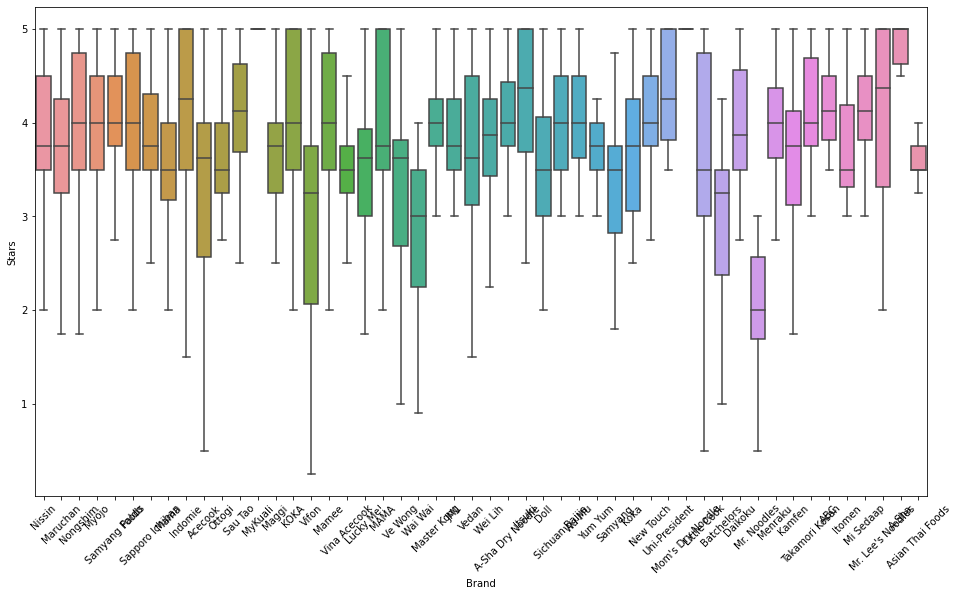

In [60]:
# QNS 1
# (x-axis, y-axis)
plt.figure(figsize=(16,9))
sns.boxplot(df['Brand'], df['Stars'], order=brand_count.index,
           showfliers = False) # limit to top 50

plt.xticks(rotation = 45)

In [62]:
# identify missing boxplots = consistent data (in a line)

df[df['Brand'] == 'MyKuali']

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
29,MyKuali,White Fish Broth Rice Vermicelli,Pack,Malaysia,5.00,0,0,0,1
99,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
110,MyKuali,Penang Red Tom Yum Goong,Pack,Malaysia,2.50,1,0,0,0
195,MyKuali,Penang White Curry Noodle (New Formulation),Pack,Malaysia,5.00,1,0,0,0
242,MyKuali,Spicy Fried Noodle MeeKuali Pedas,Pack,Malaysia,5.00,1,0,0,0
436,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
447,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
461,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
477,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
478,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0


/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Thailand'),
  Text(6, 0, 'Malaysia'),
  Text(7, 0, 'Hong Kong'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Vietnam'),
  Text(11, 0, 'UK'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'India'),
  Text(15, 0, 'Germany'),
  Text(16, 0, 'Mexico'),
  Text(17, 0, 'Australia'),
  Text(18, 0, 'Brazil'),
  Text(19, 0, 'Netherlands'),
  Text(20, 0, 'Myanmar'),
  Text(21, 0, 'Nepal'),
  Text(22, 0, 'Pakistan'),
  Text(23, 0, 'Bangladesh'),
  Text(24, 0, 'Hungary'),
  Text(25, 0, 'France'),
  Text(26, 0, 'Colombia'),
  Text(27, 0, 'Poland'),
  Text(28, 0, 'Cambodi

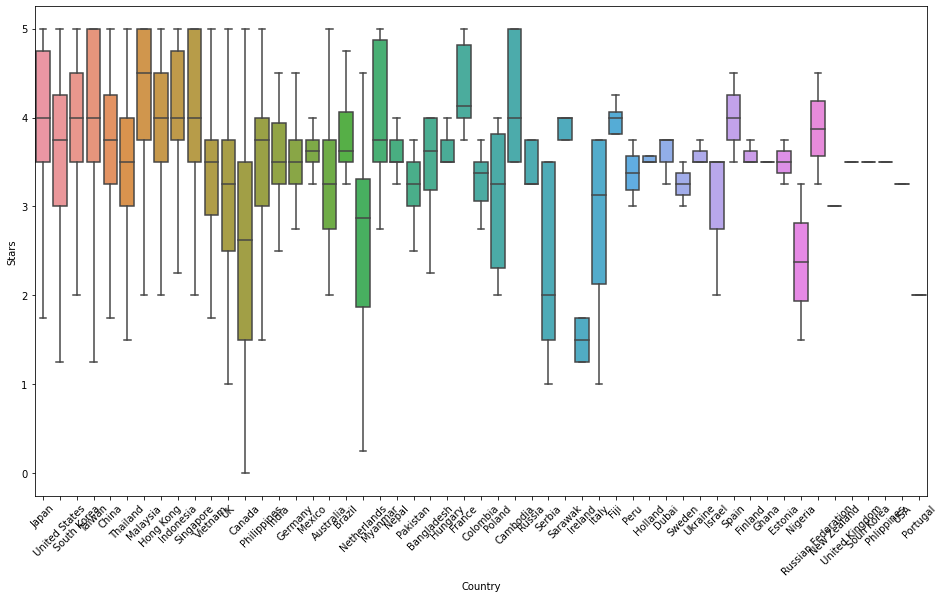

In [64]:
# QNS 2

plt.figure(figsize=(16,9))
sns.boxplot(df['Country'], df['Stars'], order=country_count.index,
           showfliers = False) # limit to top 50

plt.xticks(rotation = 45)

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='Stars'>

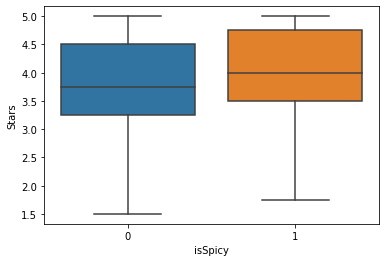

In [66]:
# QNS 3
sns.boxplot(df['isSpicy'], df['Stars'], showfliers=False)

In [68]:
# filter two DataFrames
spicy_df = df[df['isSpicy'] == 1]
nonspicy_df = df[df['isSpicy'] == 0]

In [70]:
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.836929744525547
3.6813027426160336


In [71]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


(array([ 46.,  19.,  47.,  70.,  90., 177., 322., 856., 477., 740.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

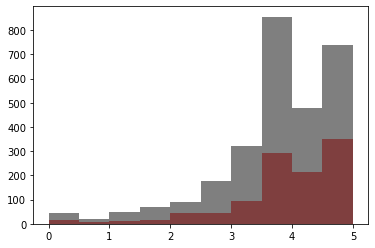

In [72]:

plt.hist(spicy_df['Stars'], alpha=0.5, color='red')
plt.hist(nonspicy_df['Stars'], alpha=0.5, color='black')

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

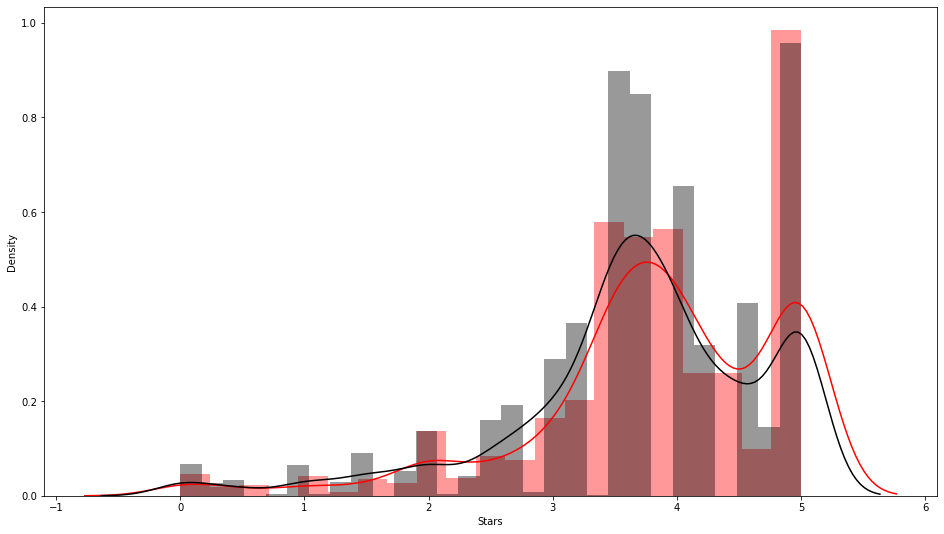

In [74]:
plt.figure(figsize=(16,9))

sns.distplot(spicy_df['Stars'], color='red')
sns.distplot(nonspicy_df['Stars'], color='black')

In [75]:
from scipy.stats import mannwhitneyu

In [76]:
# for non-normally distributed data
# p-value < 0.05 (statistically significant)
# spicy noodles have higher Stars
mannwhitneyu(spicy_df['Stars'], nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1395049.5, pvalue=1.3188122261765394e-07)

/Users/kaipug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasChicken', ylabel='Stars'>

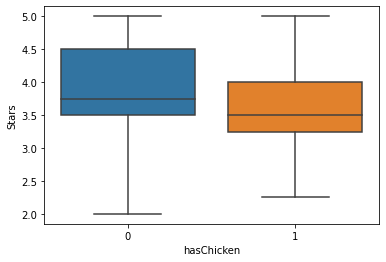

In [77]:
sns.boxplot(df['hasChicken'], df['Stars'], showfliers=False)

In [79]:
mannwhitneyu(df[df['hasChicken'] == 0]['Stars'],
            df[df['hasChicken'] == 1]['Stars'])

MannwhitneyuResult(statistic=694364.0, pvalue=3.5863420156799134e-10)

In [80]:
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,0,0,0,0
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00,0,0,0,1
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50,0,0,0,0
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,0,0,0,0
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,0,0,0
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,0,0,0
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0,1
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,0,0,0


In [81]:
df.to_csv('thebiglist_clean_extended.csv', index=None)

In [82]:
pd.read_csv('thebiglist_clean_extended.csv')

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,0,0,0,0
1,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5.00,0,0,0,1
2,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.50,0,0,0,0
3,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,0,0,0,0
4,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3935,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,0,0,0
3936,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,0,0,0
3937,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0,1
3938,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,0,0,0
